# Lending Club Case Study

### 1. Import required libraries 
### 2. Read data 
### 3. Data cleaning 
### 4. Data analysis 
### 5. Summary


# Install & Import

In [234]:
#Importing the libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Sourcing

In [235]:
loan_df = pd.read_csv(r"loan.csv", sep=',')
loan_df.shape

(39717, 111)

# Data Cleaning

In [236]:
loan_df.dropna(axis=1, how='all', inplace=True)
loan_df.shape

(39717, 57)

So, out of 111 columns 54 were null and now we are left with the remaining 57 non null columns.

In [237]:
# checking whether there is any duplicate data in any column based on their ID
duplicate_data= loan_df[loan_df.duplicated('id')]
duplicate_data.count()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec 

So, there is no duplicate data in our dataset.

In [238]:
null_percent = loan_df.apply(lambda col: 100 * col.isnull().mean())
null_percent[null_percent !=0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In comparison to rest of the columns, Columns like (desc, mths_since_last_delinq, mths_since_last_record, next_pymnt_d) can be dropped since they consist of most of null values.

In [239]:
loan_df = loan_df.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)
loan_df.shape

(39717, 53)

In [240]:
#To set the emp_length column to only number format for data analysis
loan_df.emp_length.fillna('0',inplace=True) #Setting all the null values of emp_length column to '0'

loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')  #extracting all the Numbers from the emp_length column
loan_df.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [241]:
# Removing % symbol from 'int_rate' column for future calculations ,using .strip()
#loan_df['int_rate'] = loan_df['int_rate'].str.strip('%')
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
30        7.51
31        7.90
32       15.96
33        8.90
34       15.96
35       10.65
36        9.91
37        7.90
38       12.42
39       12.69
40        7.51
41        7.90
42       18.25
43       16.77
44        6.03
45        9.91
46        8.90
47       10.65
48        6.03
49        6.62
50        9.91
51        9.91
52       10.65
53       15.96
54        9.91
55       19.91
56       19.91
57       12.42
58       10.65
59       16.77
60       12.69
61       17.27
62       14.65
63       16.77
64       10.65
65       10.65
66       1

In [242]:
# converting all the 'amount' columns into 'numeric data' to analyze any relation between them
num_cols = ['loan_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length'] #listing out all the columns having amounts, for the conversion
loan_df[num_cols] = loan_df[num_cols].apply(pd.to_numeric)


#### Based on Data Dictionary available, we performed Data Analysis of the above columns and it revealed below insights:

1. id:	ID Field may not useful for the analysis
>
2. member_id:	ID Field may not be useful for Analysis
>
3. funded_amnt: Value is very close to loan amount. For 95% of the cases, values are same
>
4. pymnt_plan:	Payment Plan has only one value 'n' so can be dropped out
>
5. zip_code:	Zip Code has just intitial 3 Digits and may not be useful for further analysis
>
6. initial_list_status:	Has only one Value 'F' so can be dropped out
>
7. acc_now_delinq:	Has a constant value of 0, so no meaningful insights can be derived
>
8. delinq_2yrs:	Past due amount which has only one value, so no meaninful insights can be derived
>
9. out_prncp:	Has a constant value of 0, so no meaningful insights can be derived
>
10. out_prncp_inv:	Has a constant value of 0, so no meaningful insights can be derived
>
11. title:	free text field. Doesnt add any firther infirmation for EDA analysis so can be dropped
>
12. Apart from these columns, there were various columns which represented the customer behaviour and since we itend to do the diagnostic analysis so we can drop such columns.
>
>
Hence, based on the above reasons the we are planning to drop all the above columns

In [243]:
loan_df.drop(labels=['id','member_id','funded_amnt','pymnt_plan','zip_code','initial_list_status','acc_now_delinq','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc',
                     'pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                     'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','title'], axis=1, inplace=True)
loan_df.shape


(39717, 24)

Now, we will perform EDA with these 24 features.

# Data Analysis

## The goal is to find out drivers of default so that those can be used as criteria during loan aprroval/rejection.

In [244]:
(loan_df.loan_status.value_counts()*100)/len(loan_df)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

Observations
1. 82.96 percent loans were fully paid.
2. Close to 14% loans were charged off

In [245]:
#Percentages of the variable 'purpose of loan' as per total loans issued
(loan_df.purpose.value_counts()*100)/len(loan_df)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Observations
1. Majority of the loans are being taken for 'debt consolidation' i.e. 47% and 'Credit card bill payment' i.e. 13% .
2. 'Other' is also an important purpose of loan taken i.e. 10% .
3. Rest of the purpose doesn't have any high significance in terms of contribution.

In [246]:
#Deriving new columns Month and Year from issue date 'issue_d'

loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y') #converting to Datetime format
loan_df['year']=loan_df['issue_d'].dt.year #Year column added to loan dataset
loan_df['month']=loan_df['issue_d'].dt.month  #Month column added to loan dataset

loan_df.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,addr_state,dti,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,month
0,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,AZ,27.65,0.0,1,0.0,0,0.0,0.0,2011,12
1,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,GA,1.00,0.0,1,0.0,0,0.0,0.0,2011,12


##   Univariate and Segmented Univariate Analysis

#### count plot of "count" vs "grade" 

<Axes: xlabel='grade', ylabel='count'>

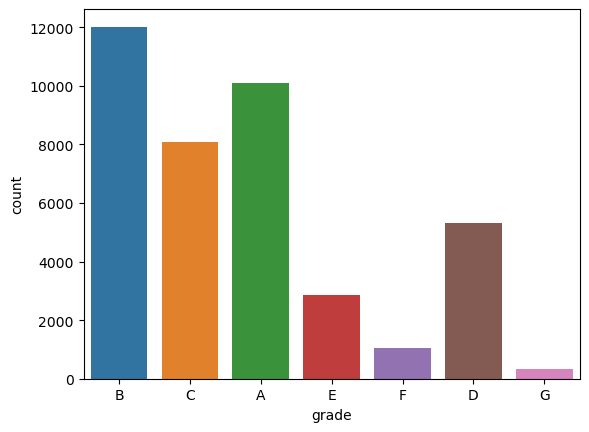

In [247]:
sns.countplot(x=loan_df['grade'])

#### count plot of "count" vs "sub_grade" 

<Axes: xlabel='sub_grade', ylabel='count'>

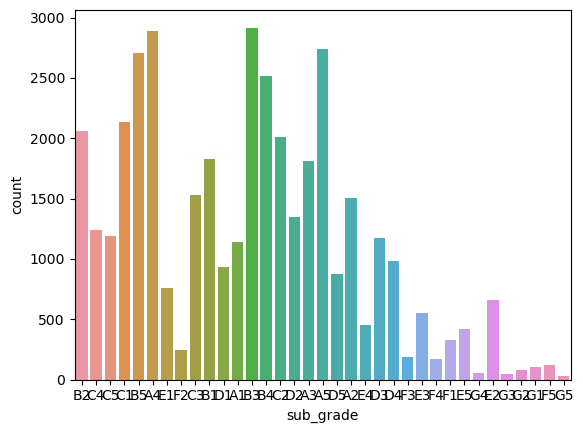

In [248]:
sns.countplot(x=loan_df['sub_grade'])

#### Count plot of "count" vs "charge status "

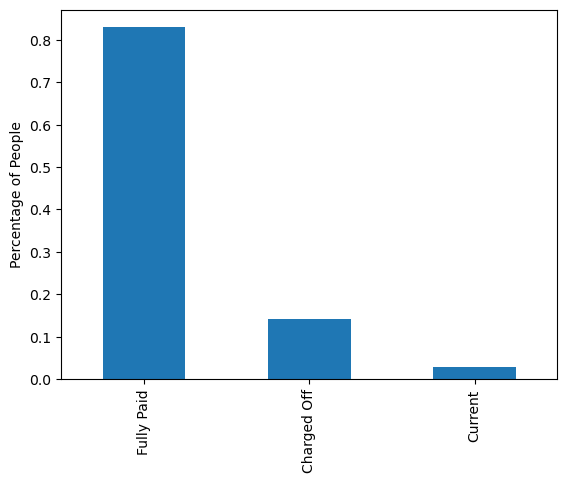

In [249]:
loan_df.loan_status.value_counts(normalize=True).plot.bar()
plt.ylabel('Percentage of People')
plt.show()

In [250]:
# Basic analysis details of loan_amnt column using describe method - Quantitative Variables
loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

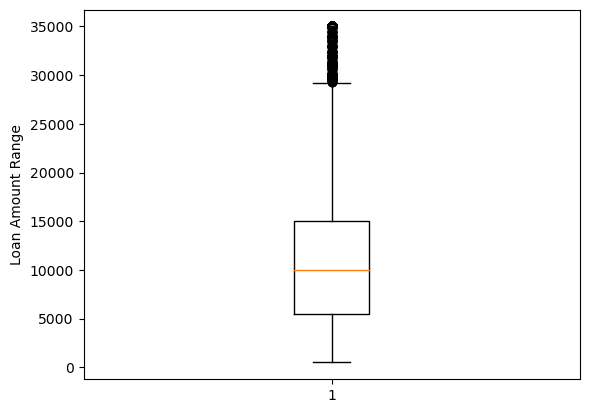

In [251]:
#Checking the loan Amount variation
plt.boxplot(loan_df.loan_amnt)
plt.ylabel("Loan Amount Range")
plt.show()


Remove outliers from Loan Amount column

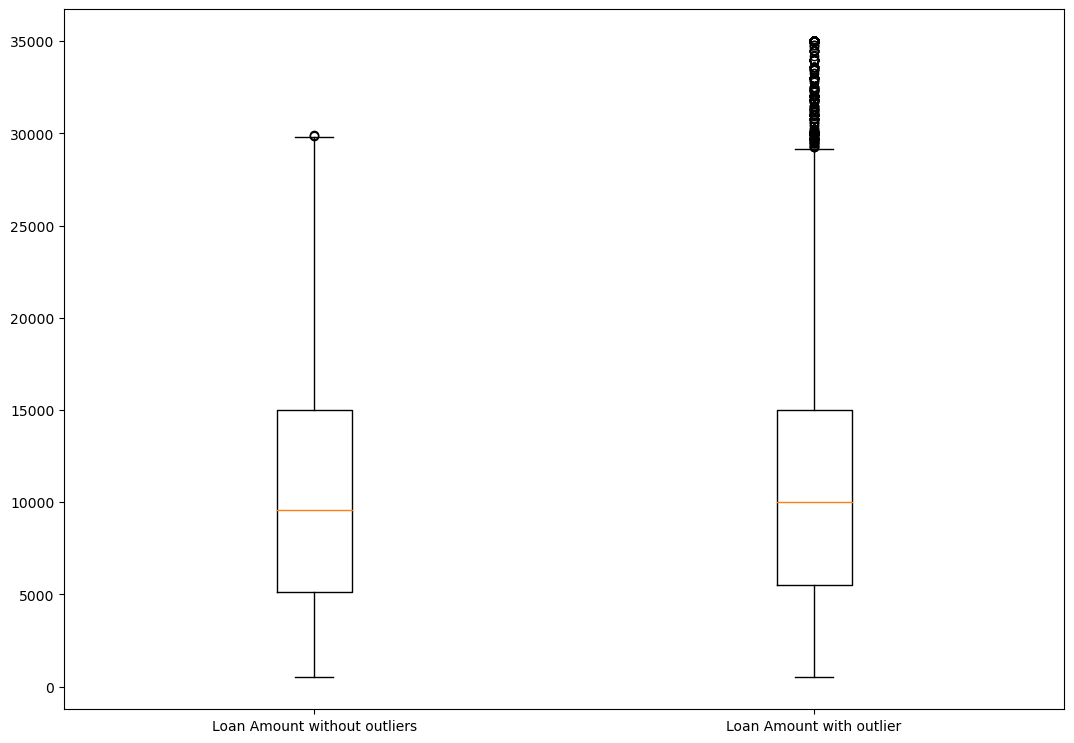

Number of outliers  (828, 26)


In [252]:
loan_amount = [loan_df[loan_df['loan_amnt'] < 30000].loan_amnt, loan_df['loan_amnt']]
loan_amount_fig = plt.figure(figsize =(10, 7))
ax = loan_amount_fig.add_axes([0,0,1,1])
ax.boxplot(loan_amount, labels=["Loan Amount without outliers", "Loan Amount with outlier"])
plt.show()
print("Number of outliers ",loan_df[loan_df['loan_amnt'] > 30000].shape)

It is evident that loan amount is in the range between 5000 and 15000 approximately i.e the 1st quartile and the 3rd quartile respectively with an inter quartile range of around 10000 and the maximum amount is closer to 30000 and the minimum loan amount is closer to 1000. The box plot confirms that outliers are present for loan amount above 30000 that are 828 rows/loan accounts.

In [253]:
print(loan_df.shape)
loan_df = loan_df.drop(loan_df[loan_df['loan_amnt'] >= 30000].index)
print(loan_df.shape)

(39717, 26)
(38512, 26)


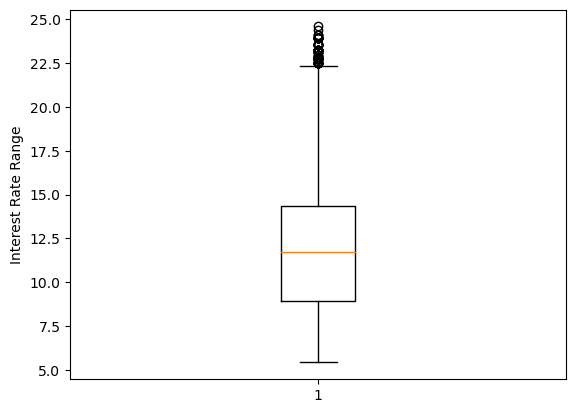

In [254]:
plt.boxplot(loan_df.int_rate)
plt.ylabel("Interest Rate Range")
plt.show()

Remove outliers from Interest Rate column

In [255]:
loan_df = loan_df.drop(loan_df[loan_df['int_rate'] > 22 ].index)
print(loan_df.shape)

(38386, 26)


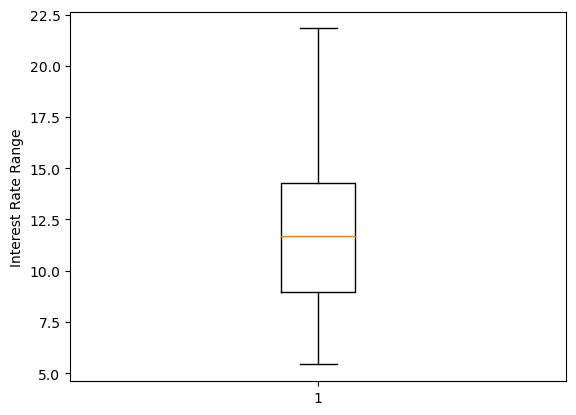

In [256]:
plt.boxplot(loan_df.int_rate)
plt.ylabel("Interest Rate Range")
plt.show()


It is evident that Interest rate is in the range between 9% and 14% approximately i.e the 1st quartile and the 3rd quartile respectively with an inter quartile range of around 5% and the maximum amount is closer to 22% and the minimum interest rate is closer to 5%. The box plot confirms that outliers are present for interest rate above 22%.

#### Plot of "int_rate" vs "loan_status"

<Axes: xlabel='loan_status', ylabel='int_rate'>

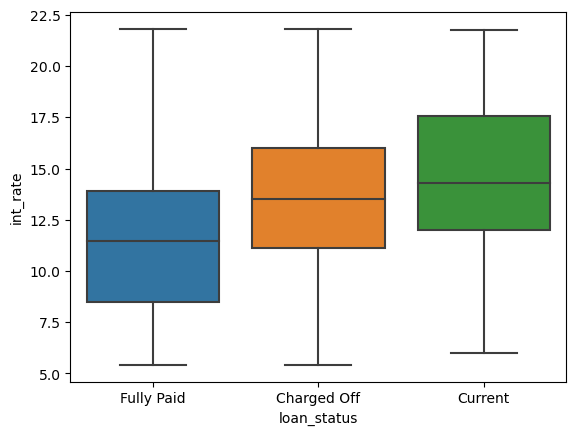

In [257]:
sns.boxplot(x="loan_status", y="int_rate",data=loan_df)


The above plot shows that if interest rate is high, there is more chance of "charged off"

#### plot of "loan status" and "income"

<Axes: xlabel='loan_status', ylabel='annual_inc'>

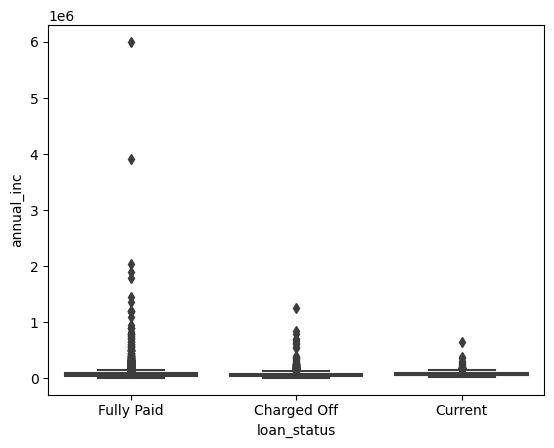

In [258]:
#temp = loan_df[loan_df['annual_inc'] < 100000]
sns.boxplot(x="loan_status", y="annual_inc",data=loan_df)

<Axes: xlabel='loan_status', ylabel='annual_inc'>

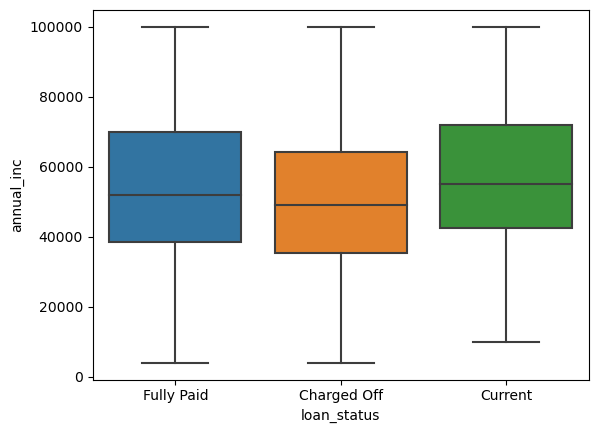

In [259]:
# Analysizing after removing outlier 
temp = loan_df[loan_df['annual_inc'] < 100000]
sns.boxplot(x="loan_status", y="annual_inc",data=temp)

The above plot is showing that the chance of Charged Off is more for persons who have lower income compared to other categories 

#### plot of  "loan_status" and "Grade"

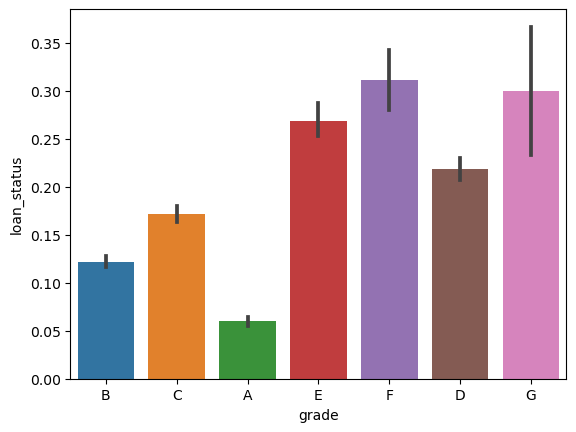

In [270]:
#Dropping "Current" from "loan_status" as it is not useful for analysis. Assigning "1" for charged-off cases 
loan_df_new = loan_df[loan_df["loan_status"] != "Current"]
loan_df_new["loan_status"] = loan_df_new["loan_status"].apply(lambda x: 0 if x=="Fully Paid" else 1)
loan_df_new["loan_status"]
loan_df_new['loan_status'].value_counts()
sns.barplot(x="grade", y="loan_status", data=loan_df_new)
plt.show()

The above plot is showing that loan grade F has higher chance of being charged off

#### plot of "loan_status" vs sub_grade

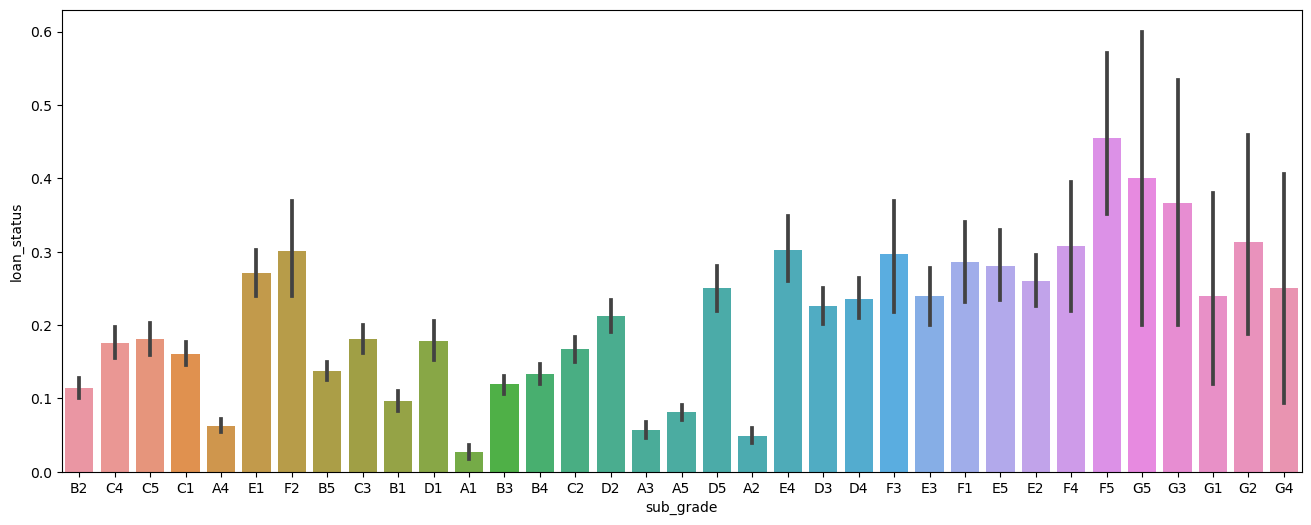

In [272]:
plt.figure(figsize=(16, 6))
sns.barplot(x="sub_grade", y="loan_status", data=loan_df_new)
plt.show()

The above plot is showing that loan sub grade G5 has higher chance of being charged off

#### plot of "loan_status" vs "term"

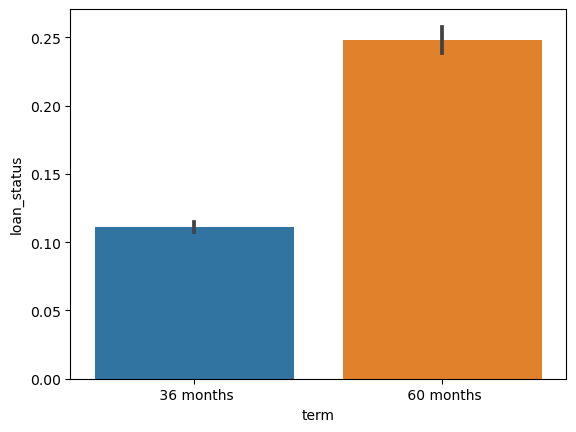

In [273]:
sns.barplot(x="term", y="loan_status",data=loan_df_new)
plt.show()

The above plot is showing if loan term is more, the chance of being charged-off is more

#### plot of "loan_status" vs "purpose of loan"

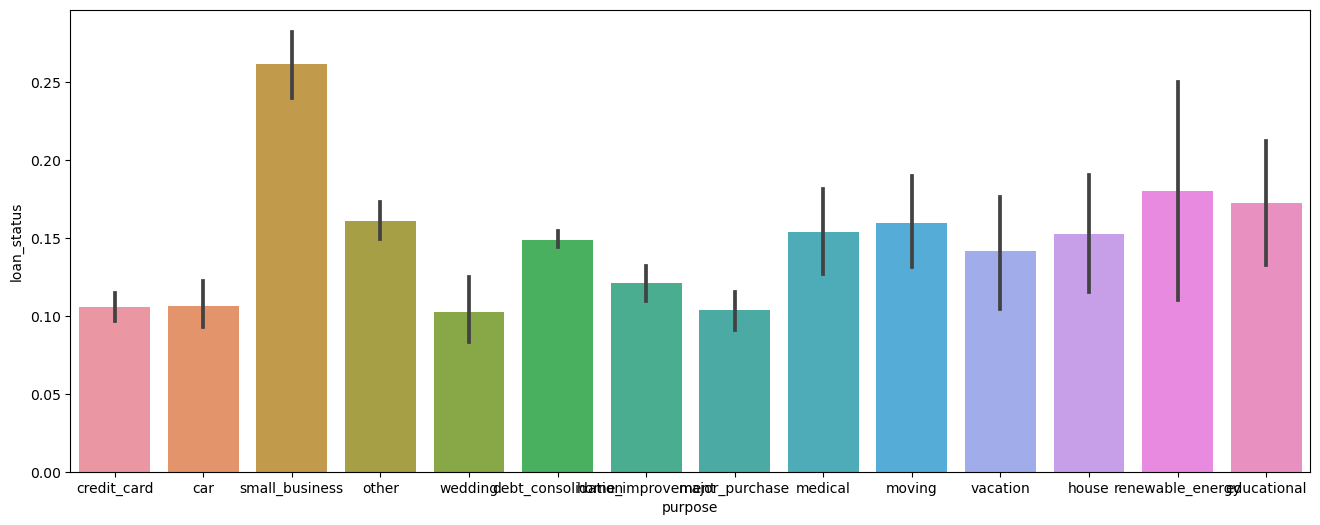

In [275]:
plt.figure(figsize=(16, 6))
sns.barplot(x="purpose", y="loan_status",data=loan_df_new)
plt.show()

The above plot is showing that loan approved for small business category has more chance of being charged off whereas loan approved for wedding categoru has least chance of being charged off 

In [286]:
print(loan_df.shape)
print(loan_df_new.shape)


(38386, 26)
(37398, 26)


In [274]:
def plot_bar(by,rotate=0):
    graph = loan_df[by].value_counts().plot(kind='bar')
    graph.set_xticklabels(graph.get_xticklabels(),rotation=rotate)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### More plots and findings 

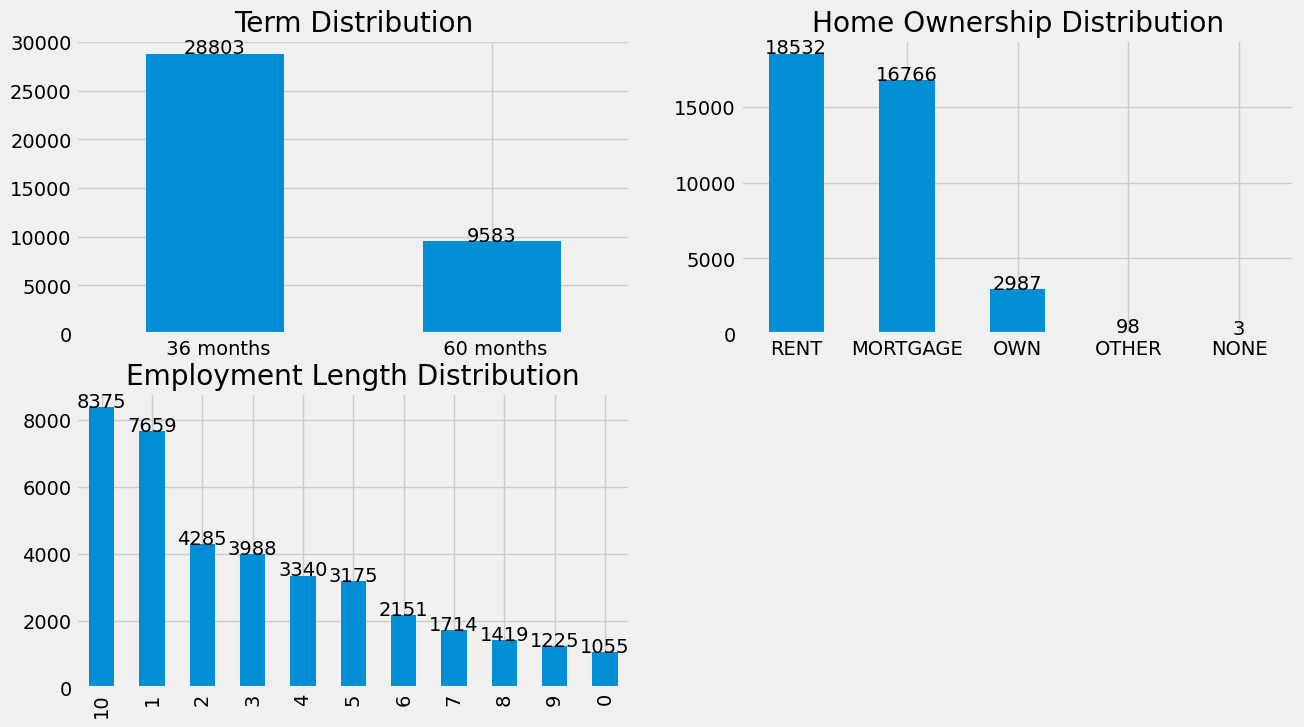

In [48]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
plt.title('Term Distribution')
plot_bar('term')

plt.subplot(2,2,2)
plt.title('Home Ownership Distribution')
plot_bar('home_ownership')


plt.subplot(2,2,3)
plt.title('Employment Length Distribution')
plot_bar('emp_length',90)

plt.show()

#### FIndings (based on above plots)



*   Majority of the loan term period is for 36 months.
*   People seeking out for loan mostly belong to Rent or Mortgage based home ownership.
*   Majority of people tend to seek out loan in either 10/10+ years of employment or withing their 1st year of employment.





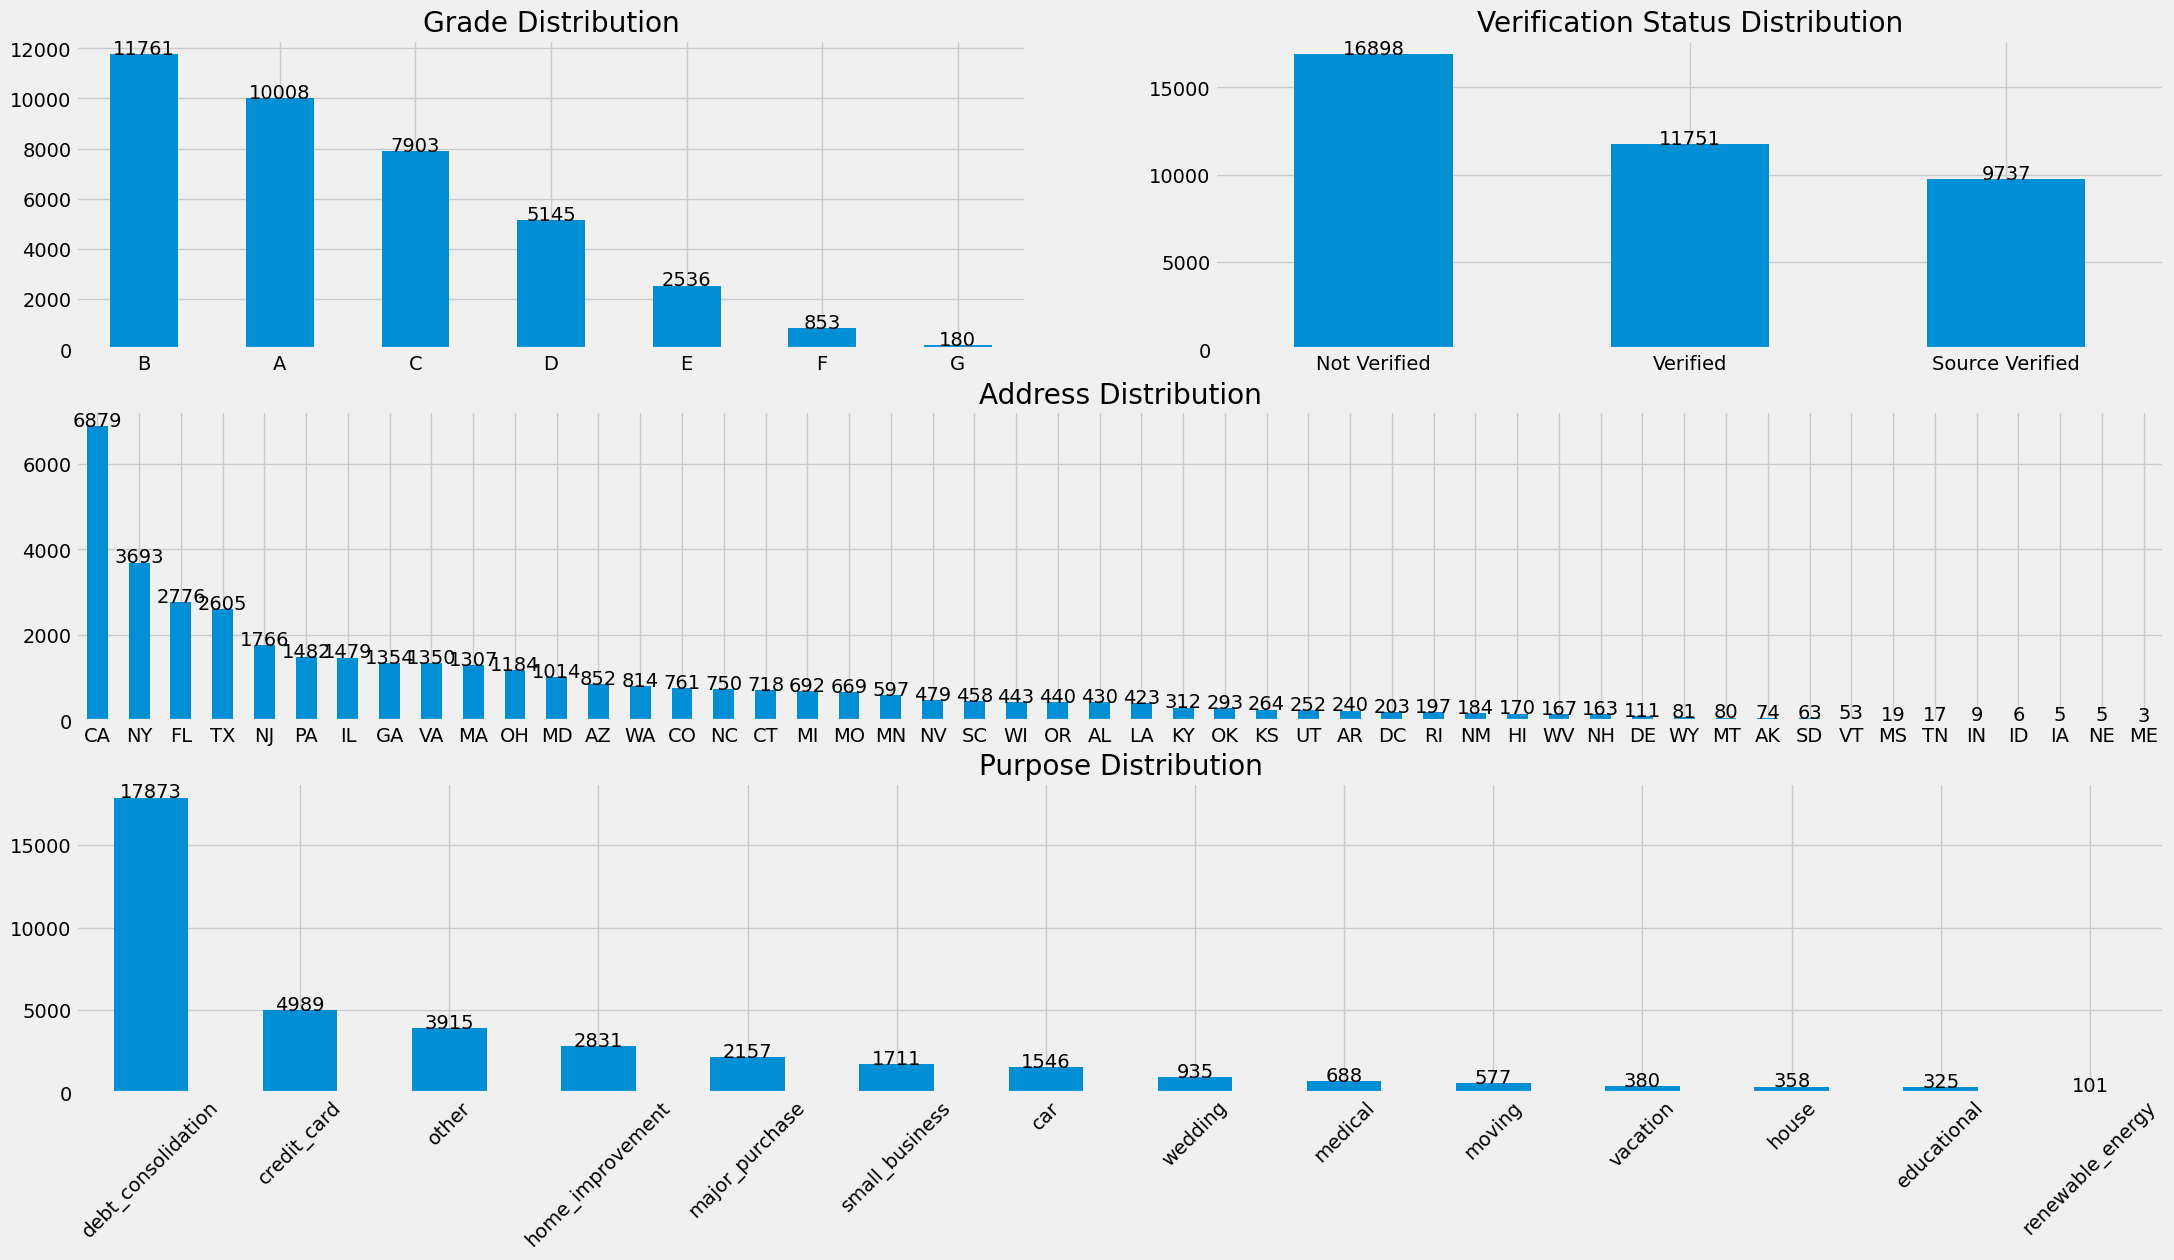

In [54]:
plt.figure(figsize=(24, 13))

plt.subplot(3,2,1)
plt.title('Grade Distribution')
plot_bar('grade')

plt.subplot(3,2,2)
plt.title('Verification Status Distribution')
plot_bar('verification_status')

plt.subplot(3,2,(3,4))
plt.title('Address Distribution')
plot_bar('addr_state')

plt.subplot(3,2,(5,6))
plt.title('Purpose Distribution')
plot_bar('purpose', 45)

plt.show()

#### Findings based on above plots


*   Majority of loan seekers belong to grade B, followed by A,C,D.
*   Proportion of non verified users are more than verified ones.
*   A big proportion of loan seekers belong to California. Top 4 states collaboatively consist of 50% of loan seekers.
*   More than half of the loan seekers showcase the loan pupose as Debt consolidation.





# Summary

#### 1.  The main objective of this analysis was to find some drivers for the case of loan default based on the input dataset
#### 2.  We started with an input dataset having 39717 rows and 111 columns
#### 3.  We did the data cleaning before analyzing the data. The data cleaning step included "dropping cloumns having no value", "checking for duplicate data", "reformatting column value (by changing data type,removing unwanted patterns etc.) suitabe for data analysis", "removing outliers".  The no. of rows and columns after data cleaning was reduced to 37398 and 111 respectively.
#### 4.   After data cleaning, we started with univariate and segmented univariate analysis. "loan_status" was the target variable for the analysis and we found some major drivers for "loan_status"
#####        a) interest rate -   there is higher chance of  Charged-off if the interest rate is high 
#####        b) anual_inc     -   there is higher chance of Charged-off if the anual income is low
#####        c) grade            -   there is higher chance of Charged-off if loan grade is of G category
#####        d) sub_grade   -   there is higher chance of Charged-off if loan grade is of F5 category
#####        e) term              -   there is higher chance of Charged-off if no. of learn terms is 60
#####        f)  purpose       -   there is higher chance of Charged-off if loan is taken for small business 
 
